# Data Understanding Part 

In [1]:
import json
file_path = "C:/Users/OsamaAl-Mofti/Desktop/my documents/my documents 2/CV +Cover letters/job applying/OVIVA/data.json"

In [2]:
# Read JSON file
file= open(file_path, 'r')
data= json.load(file)

In [3]:
print("Number of Rows:" , len(data))

# Display meal log information for a specific row 
row_index = 0

print("User ID:", data[row_index]['user_id'])
print("Log Time:", data[row_index]['log_time'])
print("Description:", data[row_index]['description'])


file.close()

Number of Rows: 724
User ID: U010
Log Time: 2020-01-15 08:30:00
Description: A plate of scrambled eggs and toast.


In [4]:
#json to CSV for manuall data analysing 

import json
import csv

def json_to_csv_nested(json_filename, csv_filename, delimiter='_', missing_value=''):
    try:
        # Open the JSON file for reading
        with open(json_filename, 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)
        
        if not data or not isinstance(data, list):
            raise ValueError("Invalid JSON data. Expecting a list of records.")
        
        # Define a dictionary to store the flattened data and column names
        flattened_data = []
        columns = set()
        
        # Flatten the JSON data
        for record in data:
            flat_record = {}
            flatten_json(record, flat_record, delimiter, columns)
            flattened_data.append(flat_record)
        
        # Open the CSV file for writing with UTF-8 encoding
        with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=columns)
            
            # Write the header row to the CSV file
            writer.writeheader()
            
            # Write the data to the CSV file
            for flat_record in flattened_data:
                writer.writerow(flat_record)
        
        print(f"CSV conversion complete. Data from '{json_filename}' saved to '{csv_filename}'.")
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def flatten_json(data, flat_data, delimiter, columns, parent_key=''):
    if isinstance(data, dict):
        for key, value in data.items():
            new_key = parent_key + delimiter + key if parent_key else key
            flatten_json(value, flat_data, delimiter, columns, new_key)
    elif isinstance(data, list):
        for i, item in enumerate(data):
            new_key = parent_key + delimiter + str(i) if parent_key else str(i)
            flatten_json(item, flat_data, delimiter, columns, new_key)
    else:
        flat_data[parent_key] = data
        columns.add(parent_key)


# Usage
json_to_csv_nested('C:/Users/OsamaAl-Mofti/Desktop/my documents/my documents 2/CV +Cover letters/job applying/OVIVA/data.json', 'OVIVA.csv', delimiter='_', missing_value='')

CSV conversion complete. Data from 'C:/Users/OsamaAl-Mofti/Desktop/my documents/my documents 2/CV +Cover letters/job applying/OVIVA/data.json' saved to 'OVIVA.csv'.


In [5]:
import pandas as pd
df = pd.read_csv('OVIVA.csv')

In [6]:
df.describe()

,description,user_id,log_time
count,724,724,724
unique,315,10,714
top,A plate and cutlery set on a kitchen counter.,U003,2020-03-20 18:30:00
freq,21,95,2


In [7]:
print(df.dtypes)

description    object
user_id        object
log_time       object
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  724 non-null    object
 1   user_id      724 non-null    object
 2   log_time     724 non-null    object
dtypes: object(3)
memory usage: 17.1+ KB


In [9]:
df.columns

Index(['description', 'user_id', 'log_time'], dtype='object')

In [10]:
# Check for missing values
print(df.isnull().sum())

description    0
user_id        0
log_time       0
dtype: int64


In [11]:
# Convert 'log_time' to datetime format 
df['log_time'] = pd.to_datetime(df['log_time'])


In [12]:
# Extracting temporal features(day,week,month)
df['day_of_week'] = df['log_time'].dt.day_name()
df['week'] = df['log_time'].dt.week
df['month'] = df['log_time'].dt.month


C:\Users\OsamaAl-Mofti\AppData\Local\Temp\ipykernel_7604\3747105897.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['log_time'].dt.week


In [13]:
# Extracting the time component only
df['meal_time_only'] = df['log_time'].dt.time


In [14]:
# Add a column for meal type based on the description (you can customize this based on your criteria)
df['meal_type'] = df['description'].apply(lambda x: 'Breakfast' if 'eggs' in x else 'Lunch' if 'lunch' in x else 'Dinner')

In [15]:
# Get unique user IDs
unique_users = df['user_id'].unique()

print("Unique Users:")
print(unique_users)

Unique Users:
['U010' 'U008' 'U005' 'U003' 'U009' 'U002' 'U006' 'U004' 'U007' 'U001']


In [16]:
df.head()

,description,user_id,log_time,day_of_week,week,month,meal_time_only,meal_type
0,A plate of scrambled eggs and toast.,U010,2020-01-15 08:30:00,Wednesday,3,1,08:30:00,Breakfast
1,A bowl of vegetable stir-fry with quinoa.,U008,2020-02-02 12:15:00,Sunday,5,2,12:15:00,Dinner
2,A serving of grilled chicken with steamed broc...,U005,2020-03-10 18:45:00,Tuesday,11,3,18:45:00,Dinner
3,A bowl of lentil soup with a side salad.,U003,2020-04-05 13:00:00,Sunday,14,4,13:00:00,Dinner
4,A plate of spaghetti with marinara sauce and m...,U009,2020-05-20 20:00:00,Wednesday,21,5,20:00:00,Dinner


In [17]:
# Meal Composition
# Assuming breakfast: 6:00 AM - 11:59 AM, lunch: 12:00 PM - 4:59 PM, dinner: 5:00 PM - 11:59 PM
df['meal_type'] = pd.cut(df['log_time'].dt.hour, bins=[0, 6, 12, 17, 23], labels=['Night_Snack', 'Breakfast', 'Lunch', 'Dinner'])
print("\nMeal Composition:")
print(df['meal_type'].value_counts())


Meal Composition:
Dinner         281
Lunch          198
Breakfast      122
Night_Snack     98
Name: meal_type, dtype: int64


In [19]:
# Filter rows where 'meal_type' is NaN (No food consumed)
nan_meal_type_rows = df[df['meal_type'].isna()]

# Display the rows with NaN values in 'meal_type'
print("Rows with NaN in 'meal_type':")
print(nan_meal_type_rows)

Rows with NaN in 'meal_type':
                                           description user_id  \
243   A bowl and a spoon resting on a kitchen counter.    U004   
255      A bowl and a ladle placed on a kitchen shelf.    U006   
267      A bowl and a ladle placed on a kitchen shelf.    U004   
279   A bowl and a spoon laid out on a kitchen island.    U002   
380    A bowl of mixed fruits set on a breakfast tray.    U003   
402  A plate of sandwiches laid out for a conferenc...    U002   
403    A bowl of mixed fruits set on a breakfast tray.    U006   
412        A bowl of mixed nuts set on a coffee table.    U001   
423  A bowl and spoon laid out on a cozy kitchen ta...    U008   
435        A bowl of mixed nuts set on a coffee table.    U003   
437      A plate and a fork set on a restaurant patio.    U003   
466  A bowl of soup placed on a rainy day dining ta...    U007   
477   A plate of appetizers set out at a social event.    U002   
485  A plate of desserts served at a family ga

In [20]:
# Fill NaN values with 'Night_Snack'
df['meal_type'] = df['meal_type'].fillna('Night_Snack')

print("\nMeal Composition:")
print(df['meal_type'].value_counts())


Meal Composition:
Dinner         281
Lunch          198
Night_Snack    123
Breakfast      122
Name: meal_type, dtype: int64


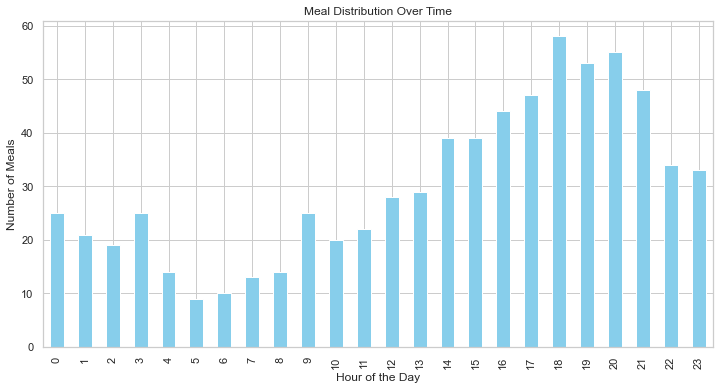

In [227]:
# Meal distribution by hour
import pandas as pd
import matplotlib.pyplot as plt
df['hour'] = df['log_time'].dt.hour
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Meals')
plt.title('Meal Distribution Over Time')
plt.show()


#Notes on the graph
#Peak hours are 18-20 when users are back from work they consume dinner meal as the highest.


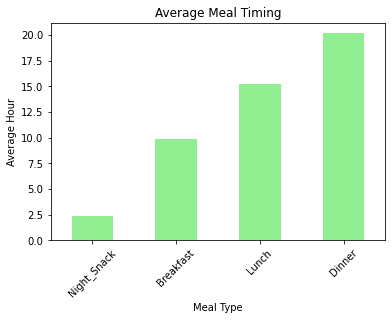

In [22]:
# AVG Meal Timing
import pandas as pd
import matplotlib.pyplot as plt
df['hour'] = df['log_time'].dt.hour
meal_timing_distribution = df.groupby('meal_type')['hour'].mean()
meal_timing_distribution.plot(kind='bar', rot=45, color='lightgreen')
plt.title('Average Meal Timing')
plt.xlabel('Meal Type')
plt.ylabel('Average Hour')
plt.show()

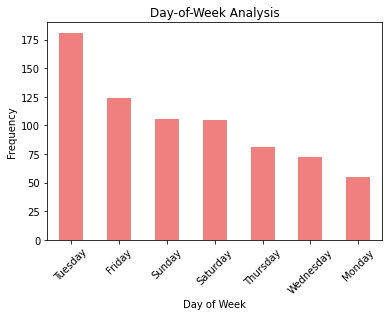

In [23]:
# Day-of-Week Analysis
import pandas as pd
import matplotlib.pyplot as plt
day_of_week_distribution = df['day_of_week'].value_counts()
day_of_week_distribution.plot(kind='bar', rot=45, color='lightcoral')
plt.title('Day-of-Week Analysis')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

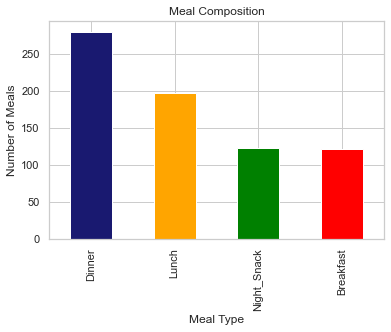

In [234]:
# Create a bar plot
import pandas as pd
import matplotlib.pyplot as plt
df['meal_type'].value_counts().plot(kind='bar', color=['midnightblue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Meal Type')
plt.ylabel('Number of Meals')
plt.title('Meal Composition')

# Show the plot
plt.show()

#Notes on the graph
#Night_snacks meals is an aim to be reduced for all users 

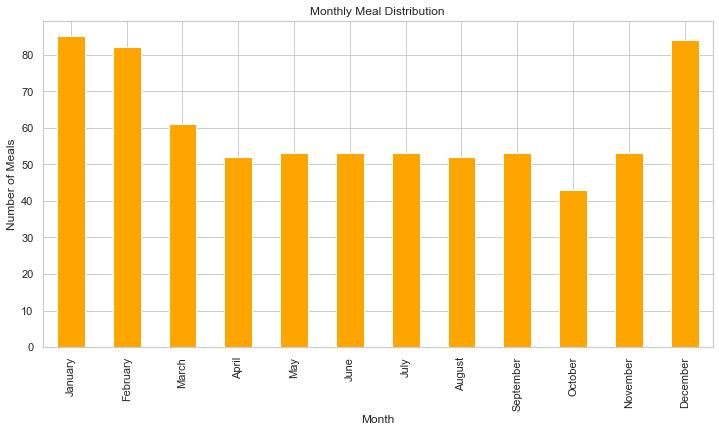

In [226]:
# Plot the monthly meal distribution with month names
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
monthly_counts = df.resample('M', on='log_time').size()
monthly_counts.index = monthly_counts.index.strftime('%B')  # Convert the index to month names
monthly_counts.plot(kind='bar', color='orange')

plt.xlabel('Month')
plt.ylabel('Number of Meals')
plt.title('Monthly Meal Distribution')
plt.show()

#Notes on the graph
#users consume Highest meals in winter seasons December-Feb

In [26]:
# Consistency
print("\nConsistency of Meal Logging:")
print(df['user_id'].value_counts())


Consistency of Meal Logging:
U003    95
U007    78
U006    75
U010    73
U002    73
U008    69
U009    67
U004    67
U005    64
U001    63
Name: user_id, dtype: int64


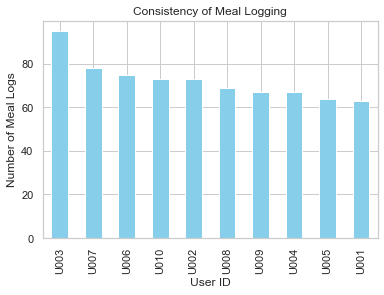

In [242]:
user_consistency = df['user_id'].value_counts()

# Create a bar plot
user_consistency.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Number of Meal Logs')
plt.title('Consistency of Meal Logging')

# Show the plot
plt.show()

#Notes on the graph
#meals data for user 003 is the highest (Golden or old user for Oviva) with 95 meals

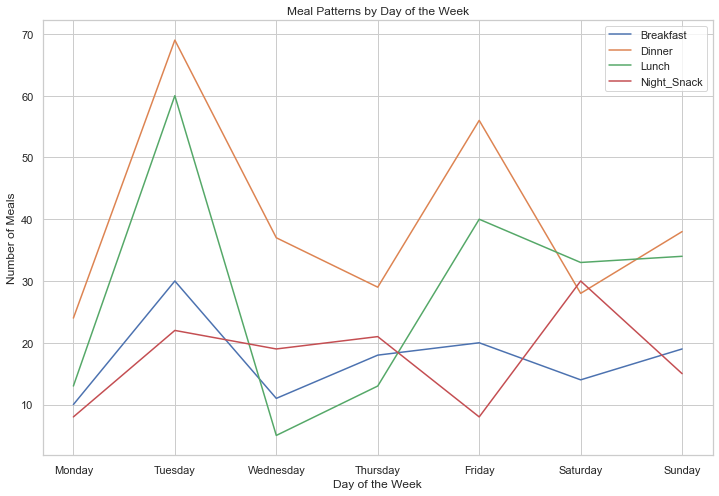

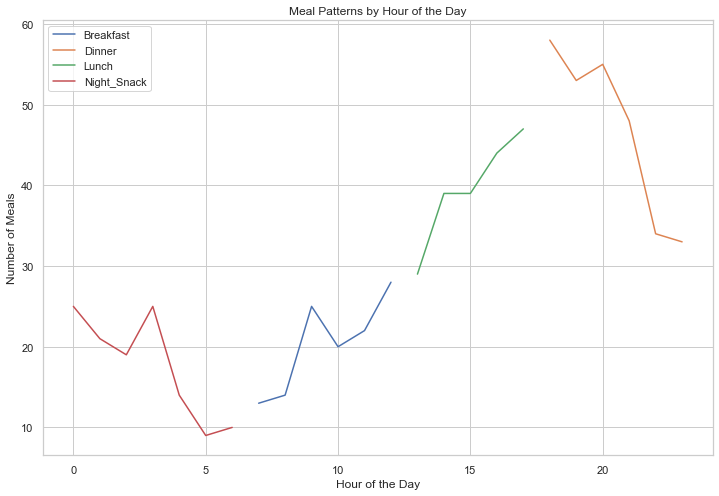

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting meal patterns by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting meal patterns by day of the week
plt.figure(figsize=(12, 8))
for meal_type in df['meal_type'].unique():
    meal_data = df[df['meal_type'] == meal_type]
    meal_data_counts = meal_data['day_of_week'].value_counts().reindex(day_order)
    meal_data_counts.plot(label=meal_type)

plt.title('Meal Patterns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Meals')
plt.legend()
plt.show()

# Plotting meal patterns by hour of the day
plt.figure(figsize=(12, 8))
for meal_type in df['meal_type'].unique():
    meal_data = df[df['meal_type'] == meal_type]
    meal_data['hour'].value_counts().sort_index().plot(label=meal_type)

plt.title('Meal Patterns by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Meals')
plt.legend()
plt.show()

#Notes on the Graph
#Peak in Tuesday for (lunch and dinner) could be an offer for meals in this day
#Friday as weekend users consume more meals due to end of week they may go eat outside with family and friends. 


# Data Preperation

In [225]:
# Count the number of duplicate rows
duplicate_rows_count = len(df[df.duplicated(keep='first')])
print("Number of Duplicate Rows:", duplicate_rows_count)

Number of Duplicate Rows: 0


In [30]:
import numpy as np

def find_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z_scores > threshold]
    return outliers

# Example usage:
data = np.random.randn(100)  # Replace this with your dataset
outliers = find_outliers_z_score(data)
num_outliers = len(outliers)

print(f"Number of outliers: {num_outliers}")
print("Outliers:", outliers)


Number of outliers: 0
Outliers: []


In [29]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import nltk 
nltk.download('all')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    

True

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
# Split the text into words and count them
total_word_count = df['description'].str.split().apply(len).sum()

# Display the total number of words
print(f"Total number of words in the 'description' column: {total_word_count}")




Total number of words in the 'description' column: 7018


In [33]:
# create preprocess_text function

def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['description_preprocess'] = df['description'].apply(preprocess_text)
df



,description,user_id,log_time,day_of_week,week,month,meal_time_only,meal_type,hour,description_preprocess
0,A plate of scrambled eggs and toast.,U010,2020-01-15 08:30:00,Wednesday,3,1,08:30:00,Breakfast,8,plate scrambled egg toast .
1,A bowl of vegetable stir-fry with quinoa.,U008,2020-02-02 12:15:00,Sunday,5,2,12:15:00,Breakfast,12,bowl vegetable stir-fry quinoa .
2,A serving of grilled chicken with steamed broc...,U005,2020-03-10 18:45:00,Tuesday,11,3,18:45:00,Dinner,18,serving grilled chicken steamed broccoli .
3,A bowl of lentil soup with a side salad.,U003,2020-04-05 13:00:00,Sunday,14,4,13:00:00,Lunch,13,bowl lentil soup side salad .
4,A plate of spaghetti with marinara sauce and m...,U009,2020-05-20 20:00:00,Wednesday,21,5,20:00:00,Dinner,20,plate spaghetti marinara sauce meatball .
...,...,...,...,...,...,...,...,...,...,...
719,A bowl of pho with rare beef slices and fresh ...,U002,2020-03-05 17:05:00,Thursday,10,3,17:05:00,Lunch,17,bowl pho rare beef slice fresh herb .
720,A slice of lemon meringue pie with a buttery c...,U003,2020-03-06 13:00:00,Friday,10,3,13:00:00,Lunch,13,slice lemon meringue pie buttery crust .
721,"A bagel with avocado, tomato, and a sprinkle o...",U009,2020-03-07 08:55:00,Saturday,10,3,08:55:00,Breakfast,8,"bagel avocado , tomato , sprinkle everything b..."
722,A plate of shrimp scampi with linguine pasta.,U005,2020-03-08 18:50:00,Sunday,10,3,18:50:00,Dinner,18,plate shrimp scampi linguine pasta .


In [229]:
# List of words to be removed
#By Using an outsource food category dataset to remove none related food words in my dataset
#"C:\Users\OsamaAl-Mofti\Downloads\archive (2)\hub\train\categories\tensor_info.json"
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# List of words to be removed
import spacy
nlp = spacy.load("en_core_web_sm")
words_to_remove = ['plate', 'family', 'gathering', 'served', 'conference', 'room', 'meeting', 'beside', 'side', 'hot', 'bench', 'dinner', 'light', 'event', 'social','patio','arranged','knife','fry', 'office', 'desk', 'cream','assorted','lunch','window','everything','seasoning','grilled','slice','stir',
                   'bowl', 'mixed', 'cup', 'set', 'table', 'enjoyed', 'black', 'day', 'nook', 'reading', 'rainy', 'winter', 'evening', 'glass', 'nook', 'tray','sprinkle','prepared','crusty','whipped','open','book','marinara','baked','bar','break','windowsill','wild',
                   'plate', 'set', 'kitchen', 'bowl', 'table', 'spoon', 'fork', 'laid', 'counter', 'room', 'breakfast', 'living', 'tray', 'garden', 'serene', 'restaurant', 'whole','smoked','collard','eyed','wooden','warming','hand','jasmine',
                   'cup', 'enjoyed', 'table', 'placed', 'green', 'cafe', 'cutlery', 'cozy', 'island', 'ladle', 'shelf', 'morning', 'blanket', 'balcony', 'city', 'glass dining', 'dining', 'serving', 'picnic', 'chamomile', 'herbal', 'bedside', 'afternoon', 'relaxing']

# Function to remove specified words using spaCy
def remove_words_nlp(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text.lower() not in words_to_remove]
    return ' '.join(tokens)

# Apply the function to the 'description_preprocess' column
df['description_preprocess'] = df['description_preprocess'].apply(remove_words_nlp)


In [35]:
#TF-IDF Vectorizer to turn words in description_preprocess to numerical format

# Instantiate the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_preprocess'])

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df_vectorized = pd.concat([df, tfidf_df], axis=1)

df_vectorized

,description,user_id,log_time,day_of_week,week,month,meal_time_only,meal_type,hour,description_preprocess,...,vodka,waffle,walnut,wasabi,water,wedge,wing,wrap,yogurt,ziti
0,A plate of scrambled eggs and toast.,U010,2020-01-15 08:30:00,Wednesday,3,1,08:30:00,Breakfast,8,scrambled egg toast .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A bowl of vegetable stir-fry with quinoa.,U008,2020-02-02 12:15:00,Sunday,5,2,12:15:00,Breakfast,12,vegetable - quinoa .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A serving of grilled chicken with steamed broc...,U005,2020-03-10 18:45:00,Tuesday,11,3,18:45:00,Dinner,18,chicken steamed broccoli .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A bowl of lentil soup with a side salad.,U003,2020-04-05 13:00:00,Sunday,14,4,13:00:00,Lunch,13,lentil soup salad .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A plate of spaghetti with marinara sauce and m...,U009,2020-05-20 20:00:00,Wednesday,21,5,20:00:00,Dinner,20,spaghetti sauce meatball .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,A bowl of pho with rare beef slices and fresh ...,U002,2020-03-05 17:05:00,Thursday,10,3,17:05:00,Lunch,17,pho rare beef fresh herb .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720,A slice of lemon meringue pie with a buttery c...,U003,2020-03-06 13:00:00,Friday,10,3,13:00:00,Lunch,13,lemon meringue pie buttery crust .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721,"A bagel with avocado, tomato, and a sprinkle o...",U009,2020-03-07 08:55:00,Saturday,10,3,08:55:00,Breakfast,8,"bagel avocado , tomato , bagel .",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
722,A plate of shrimp scampi with linguine pasta.,U005,2020-03-08 18:50:00,Sunday,10,3,18:50:00,Dinner,18,shrimp scampi linguine pasta .,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
csv_file_name = "df_vectorized.csv"

# Save the DataFrame to CSV
df_vectorized.to_csv(csv_file_name, index=False)

print(f"Data has been saved to {csv_file_name}")

Data has been saved to df_vectorized.csv


In [37]:
# Calculate the sum of TF-IDF weights for each word across all meals
word_sum = tfidf_df.sum()

# Get the top N words
top_n_words = len(word_sum)  # Use the total number of unique words
top_words = word_sum.sort_values(ascending=False)

# Print the overall top words
print("Overall Top Words:")
print(top_words)


Overall Top Words:
tea         102.314696
coffee       74.809254
fruit        29.595161
soup         29.055327
sandwich     28.958475
               ...    
buffalo       0.415073
wing          0.415073
blue          0.415073
celery        0.415073
cookie        0.389472
Length: 328, dtype: float64


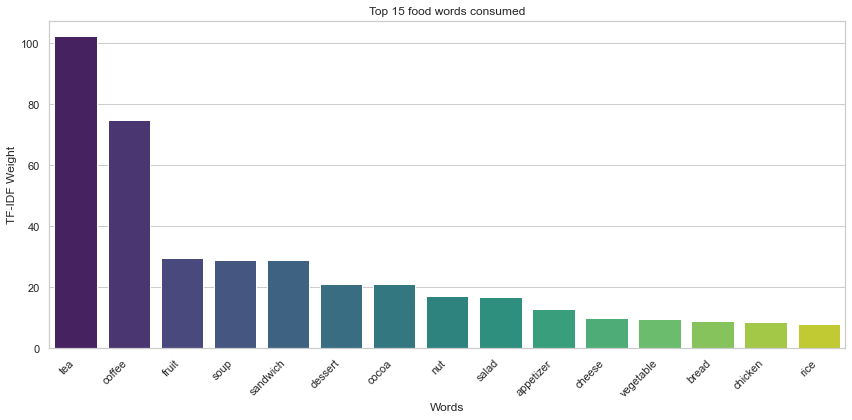

In [148]:
# Visualization of the top 15 words(top consumed food word)
import matplotlib.pyplot as plt
import seaborn as sns
top_n_words = 15
top_words = word_sum.sort_values(ascending=False).head(top_n_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")
plt.title('Top 15 food words consumed')
plt.xlabel('Words')
plt.ylabel('TF-IDF Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [72]:
#categorizing each word to its meal category 
import pandas as pd

# Categories and keywords
categories_keywords = {
    'drinks_soups': ['cocoa', 'cranberry', 'tea', 'juice', 'smoothie', 'water','vodka', 'coffee', 'latte'],
    'sugar_sweets': ['sweet', 'dessert', 'honey', 'chocolate', 'waffle', 'cake', 'muffin','cinnamon','cookie','donut','nutella','tiramisu'],
    'meat': ['chicken', 'turkey', 'salmon', 'bacon', 'meatball', 'shrimp', 'beef'],
    'rice_noodles_breads': ['sandwich', 'bread', 'rice', 'bagel', 'pho', 'basmati', 'potato', 'noodle', 'spaghetti', 'wrap', 'pasta', 'risotto', 'toast','wrap'],
    'grains': ['grain', 'lentil', 'miso', 'granola'],
    'vegetables_salads': ['vegetable', 'salad', 'lemon', 'lettuce', 'tomato', 'garlic', 'quinoa', 'mushroom', 'broccoli', 'basil', 'olive', 'appetizer'],
    'fruits': ['berry', 'broccoli', 'basil', 'spinach', 'fruit', 'strawberry', 'coconut'],
    'diaries': ['cheese', 'yogurt', 'feta', 'egg','milk'],
    'nuts': ['butternut', 'nut','walnut'],
}

# Create new columns for each category
for category in categories_keywords:
    df_vectorized[category] = 0

# Assign category values based on keywords
for index, row in df_vectorized.iterrows():
    for category, keywords in categories_keywords.items():
        # Assign 1 if any keyword is present in the vectorized TF-IDF columns
        if any(row[keyword] > 0 for keyword in keywords):
            df_vectorized.at[index, category] = 1

# Summarize category information
category_sums = df_vectorized[list(categories_keywords.keys())].sum()
print("Category Sums:")
print(category_sums)

# User-specific analysis
user_category_sums = df_vectorized.groupby('user_id')[list(categories_keywords.keys())].sum()
print("\nUser-specific Category Sums:")

user_category_sums


Category Sums:
drinks_soups           240
sugar_sweets            51
meat                    65
rice_noodles_breads    109
grains                  19
vegetables_salads      110
fruits                  64
diaries                 40
nuts                    26
dtype: int64

User-specific Category Sums:


,drinks_soups,sugar_sweets,meat,rice_noodles_breads,grains,vegetables_salads,fruits,diaries,nuts
user_id,,,,,,,,,
U001,22,5,6,10,1,6,6,1,2
U002,24,7,5,15,1,18,9,5,1
U003,27,7,9,13,1,19,8,3,4
U004,19,4,3,7,0,8,6,3,0
U005,18,4,9,13,3,10,6,5,2
U006,25,5,11,18,4,13,7,3,8
U007,26,6,6,8,5,9,5,6,2
U008,27,3,6,9,1,11,5,6,0
U009,23,6,4,9,0,7,6,4,2


In [65]:
df_vectorized

,description,user_id,log_time,day_of_week,week,month,meal_time_only,meal_type,hour,description_preprocess,...,ziti,drinks_soups,sugar_sweets,meat,rice_noodles_breads,grains,vegetables_salads,fruits,diaries,nuts
0,A plate of scrambled eggs and toast.,U010,2020-01-15 08:30:00,Wednesday,3,1,08:30:00,Breakfast,8,scrambled egg toast .,...,0.0,0,0,0,1,0,0,0,1,0
1,A bowl of vegetable stir-fry with quinoa.,U008,2020-02-02 12:15:00,Sunday,5,2,12:15:00,Breakfast,12,vegetable - quinoa .,...,0.0,0,0,0,0,0,1,0,0,0
2,A serving of grilled chicken with steamed broc...,U005,2020-03-10 18:45:00,Tuesday,11,3,18:45:00,Dinner,18,chicken steamed broccoli .,...,0.0,0,0,1,0,0,1,1,0,0
3,A bowl of lentil soup with a side salad.,U003,2020-04-05 13:00:00,Sunday,14,4,13:00:00,Lunch,13,lentil soup salad .,...,0.0,0,0,0,0,1,1,0,0,0
4,A plate of spaghetti with marinara sauce and m...,U009,2020-05-20 20:00:00,Wednesday,21,5,20:00:00,Dinner,20,spaghetti sauce meatball .,...,0.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,A bowl of pho with rare beef slices and fresh ...,U002,2020-03-05 17:05:00,Thursday,10,3,17:05:00,Lunch,17,pho rare beef fresh herb .,...,0.0,0,0,1,1,0,0,0,0,0
720,A slice of lemon meringue pie with a buttery c...,U003,2020-03-06 13:00:00,Friday,10,3,13:00:00,Lunch,13,lemon meringue pie buttery crust .,...,0.0,0,0,0,0,0,1,0,0,0
721,"A bagel with avocado, tomato, and a sprinkle o...",U009,2020-03-07 08:55:00,Saturday,10,3,08:55:00,Breakfast,8,"bagel avocado , tomato , bagel .",...,0.0,0,0,0,1,0,1,0,0,0
722,A plate of shrimp scampi with linguine pasta.,U005,2020-03-08 18:50:00,Sunday,10,3,18:50:00,Dinner,18,shrimp scampi linguine pasta .,...,0.0,0,0,1,1,0,0,0,0,0


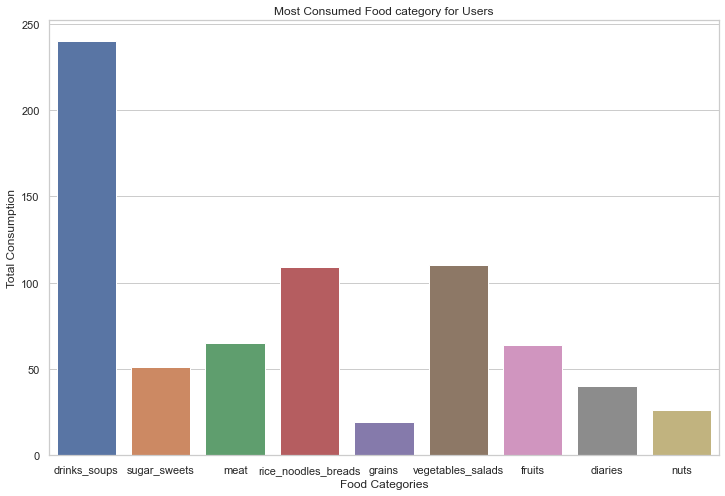

In [149]:
# Visualization of most consumed food descriptions for all users

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x=category_sums.index, y=category_sums.values)
plt.title('Most Consumed Food category for Users')
plt.xlabel('Food Categories')
plt.ylabel('Total Consumption')
plt.show()


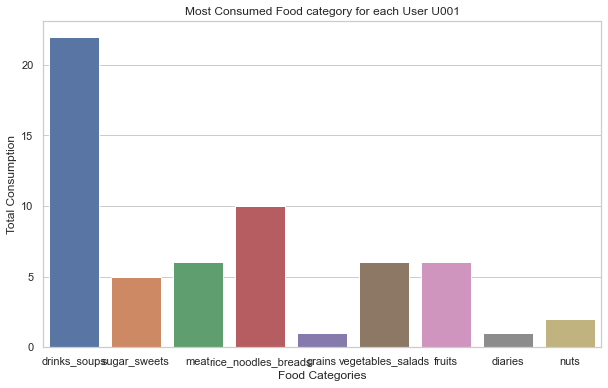

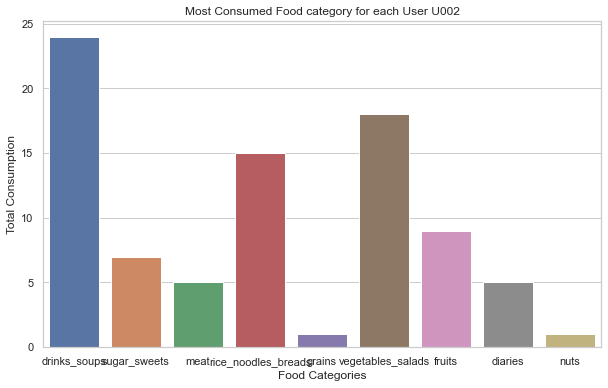

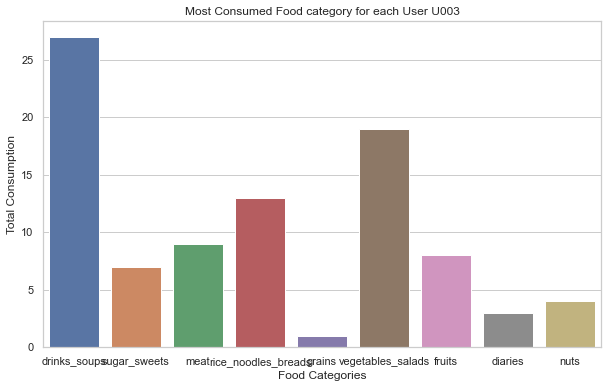

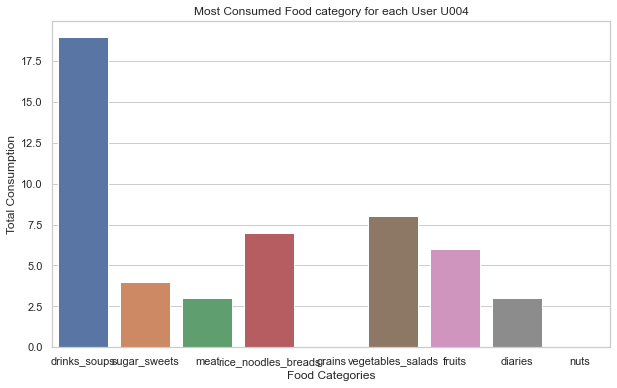

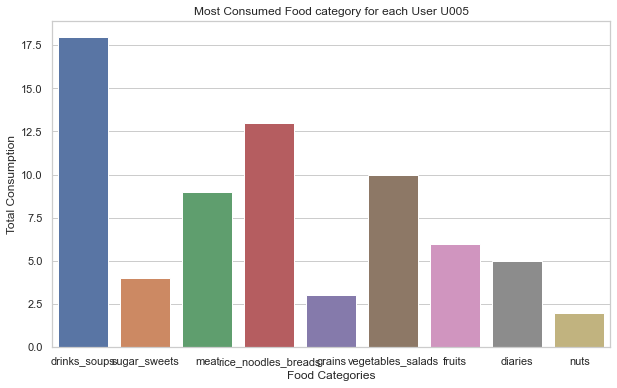

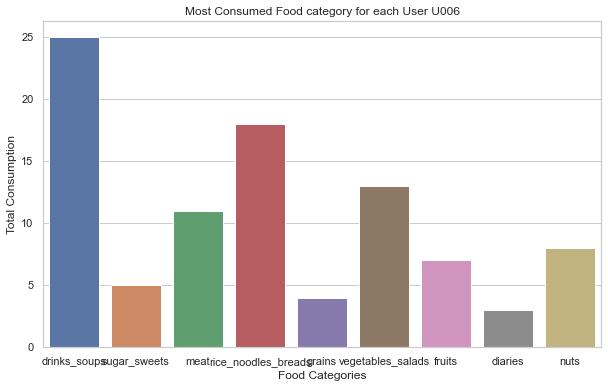

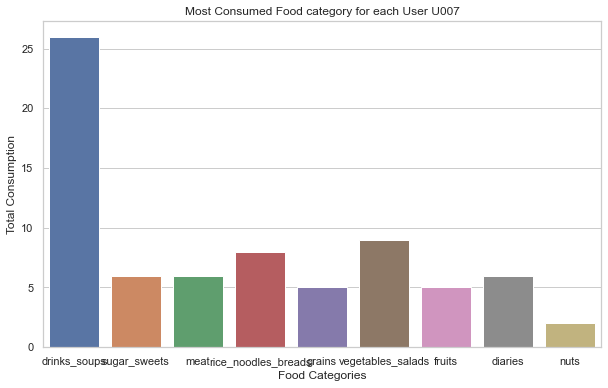

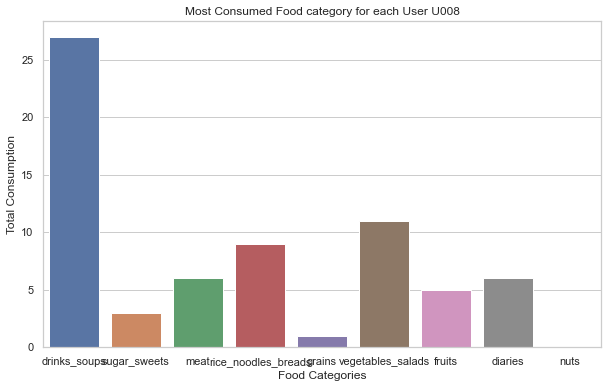

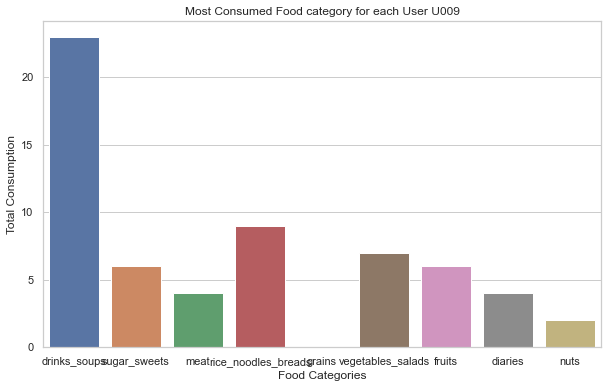

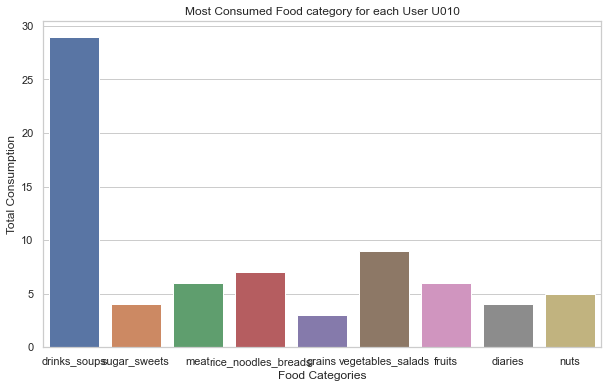

In [150]:
# Visualization of most consumed food category for each user 
import matplotlib.pyplot as plt
import seaborn as sns

# User-specific analysis
user_category_sums = df_vectorized.groupby('user_id')[list(categories_keywords.keys())].sum()

# Visualization of most consumed food descriptions for each user
for user_id, user_category_sum in user_category_sums.iterrows():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=user_category_sum.index, y=user_category_sum.values)
    plt.title(f'Most Consumed Food category for each User {user_id}')
    plt.xlabel('Food Categories')
    plt.ylabel('Total Consumption')
    plt.show()


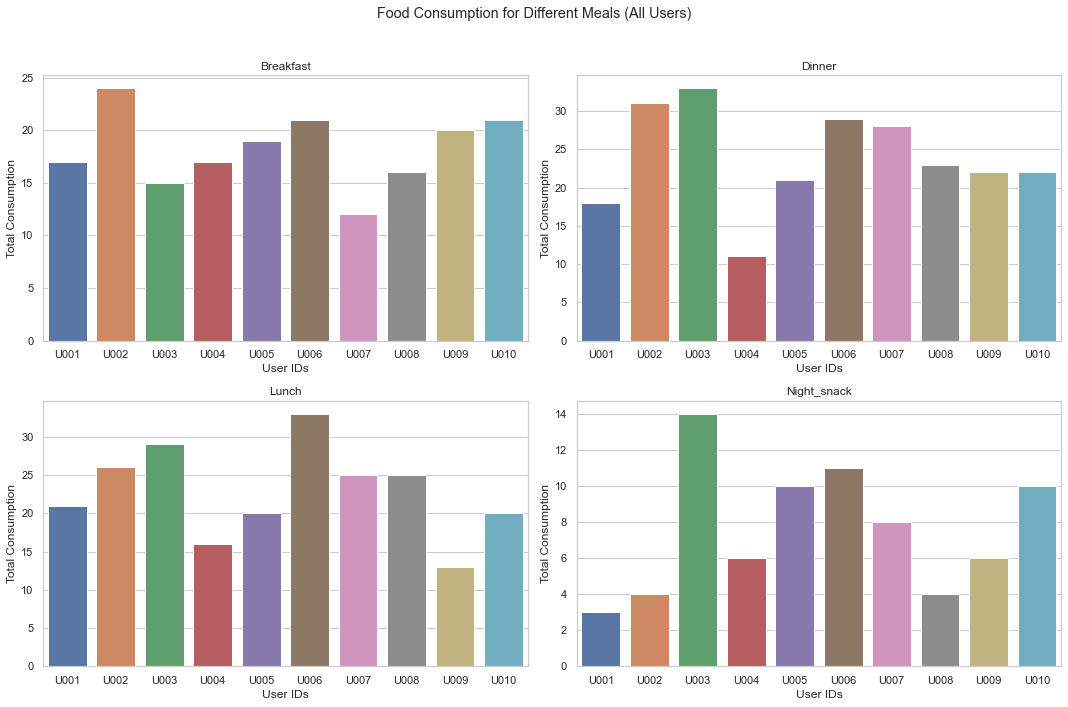

In [143]:
#food consumption for each meal type for users
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the DataFrame to include only the specified columns
selected_columns = ['user_id', 'meal_type', 'drinks_soups', 'sugar_sweets', 'meat', 'rice_noodles_breads', 'grains', 'vegetables_salads', 'fruits', 'diaries', 'nuts']
df_selected = df_vectorized[selected_columns]

# Group by 'user_id', 'meal_type' and sum the values for each category
grouped_df = df_selected.groupby(['user_id', 'meal_type']).sum()

# Visualization of food consumption for each meal type for all users
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Food Consumption for Different Meals (All Users)')

# Iterate over meal types and create bar plots
meal_types = df_selected['meal_type'].unique()
for i, meal_type in enumerate(meal_types):
    row = i // 2
    col = i % 2
    meal_type_df = grouped_df.xs(meal_type, level='meal_type', axis=0, drop_level=False)
    sns.barplot(ax=axes[row, col], x=meal_type_df.index.get_level_values('user_id'), y=meal_type_df.sum(axis=1))
    axes[row, col].set_title(meal_type.capitalize())
    axes[row, col].set_xlabel('User IDs')
    axes[row, col].set_ylabel('Total Consumption')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


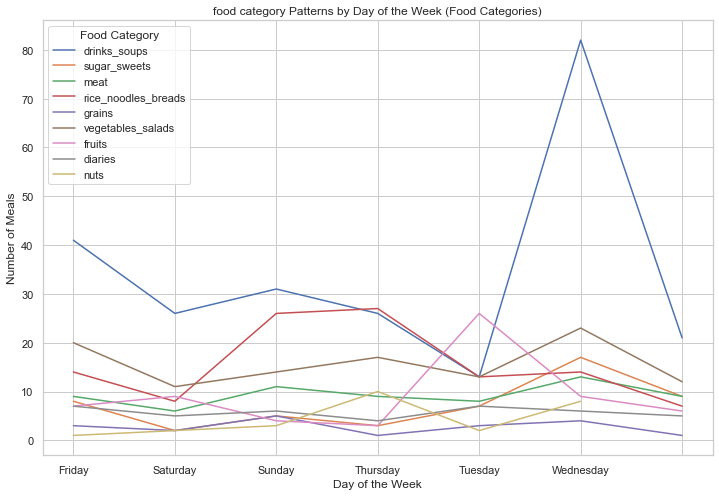

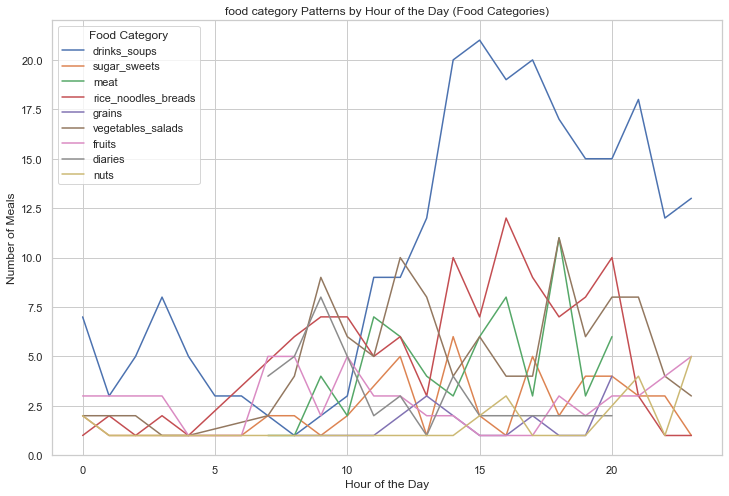

In [224]:
#Plotting food_category patterns by hour and day

import pandas as pd
import matplotlib.pyplot as plt



# by day of the week
plt.figure(figsize=(12, 8))
for food_category in ['drinks_soups', 'sugar_sweets', 'meat', 'rice_noodles_breads', 'grains', 'vegetables_salads', 'fruits', 'diaries', 'nuts']:
    food_category_data = df_vectorized[df_vectorized[food_category] > 0]
    food_category_data['day_of_week'].value_counts().sort_index().plot(label=food_category)

plt.title('food category Patterns by Day of the Week (Food Categories)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Meals')
plt.legend(title='Food Category')
plt.show()

# by hour of the day
plt.figure(figsize=(12, 8))
for food_category in ['drinks_soups', 'sugar_sweets', 'meat', 'rice_noodles_breads', 'grains', 'vegetables_salads', 'fruits', 'diaries', 'nuts']:
    food_category_data = df_vectorized[df_vectorized[food_category] > 0]
    food_category_data['hour'].value_counts().sort_index().plot(label=food_category)

plt.title('food category Patterns by Hour of the Day (Food Categories)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Meals')
plt.legend(title='Food Category')
plt.show()



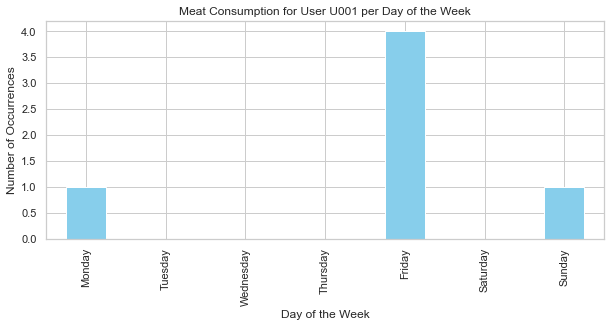

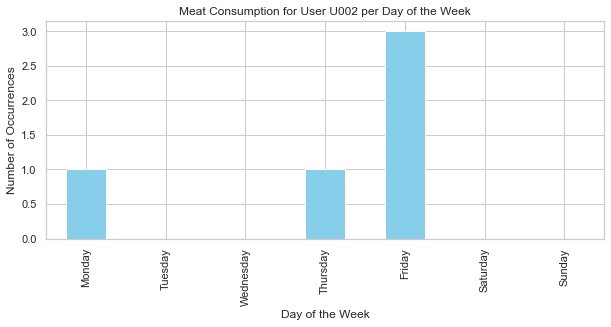

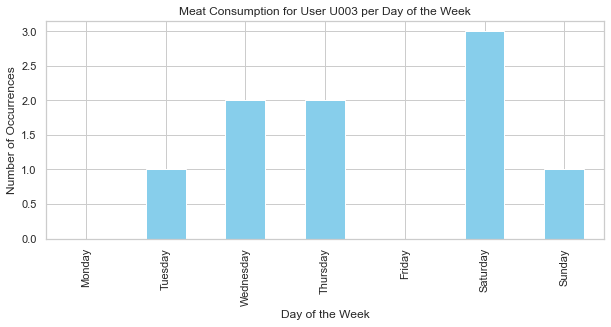

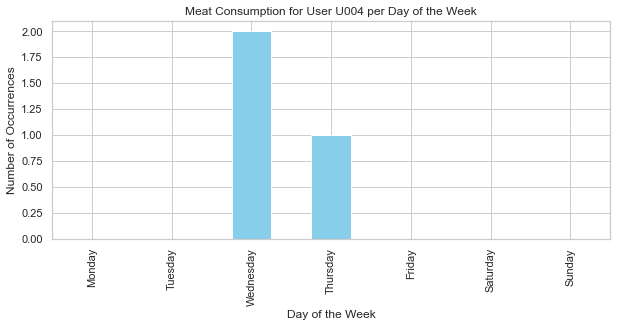

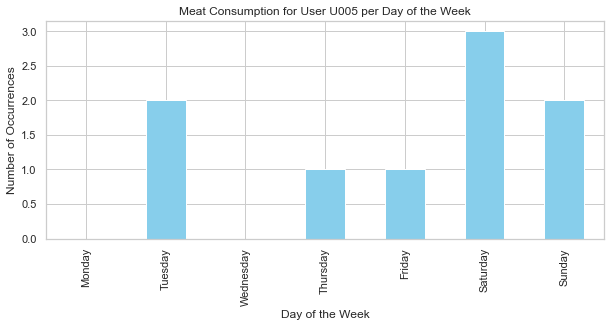

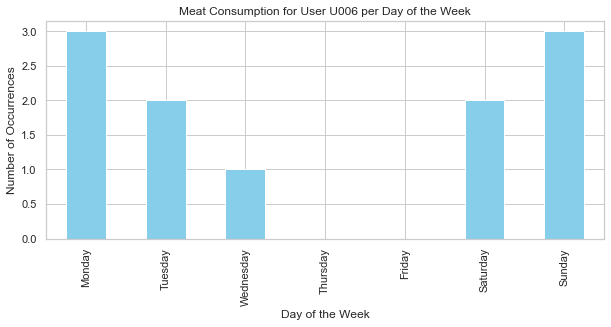

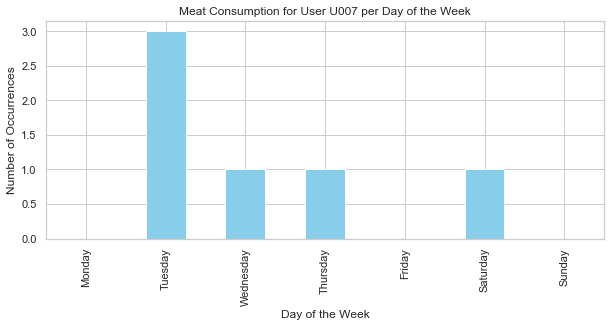

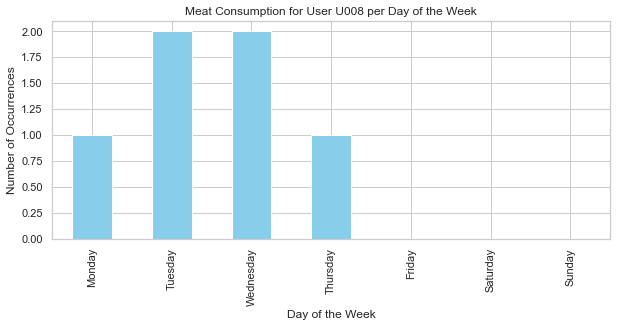

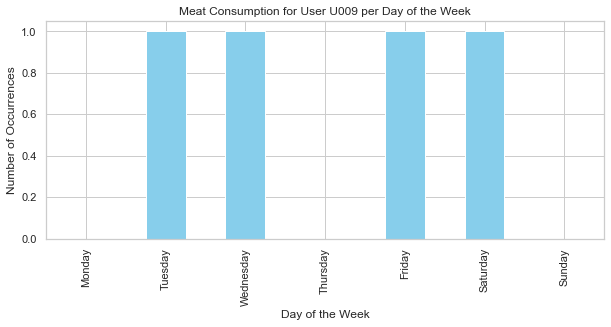

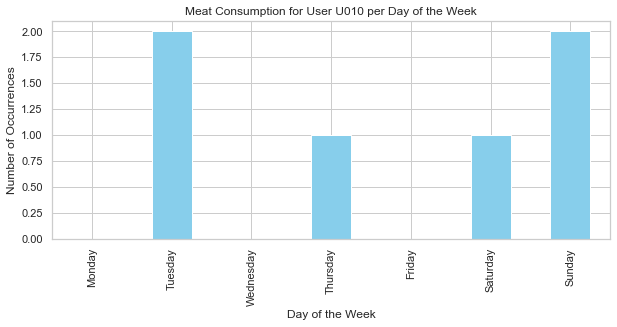

In [240]:
#meat consumption for users, are there Vegetarian users ?

import matplotlib.pyplot as plt
import seaborn as sns
meat_consumption_df_vectorized = df_vectorized[df_vectorized['meat']==1]
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate over each user and plot meat consumption per day of the week
for user_id, user_df in meat_consumption_df_vectorized.groupby('user_id'):
    user_daily_meat_consumption = user_df.groupby('day_of_week').size().reindex(days_order, fill_value=0)
    
    # Plot meat consumption for each user
    plt.figure(figsize=(10, 4))
    user_daily_meat_consumption.plot(kind='bar', color='skyblue')
    plt.title(f'Meat Consumption for User {user_id} per Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Occurrences')
    plt.show()


#Notes on the graph 
#No vegetarian users 
#user 001 should distribute meat meals on other days not on friday only


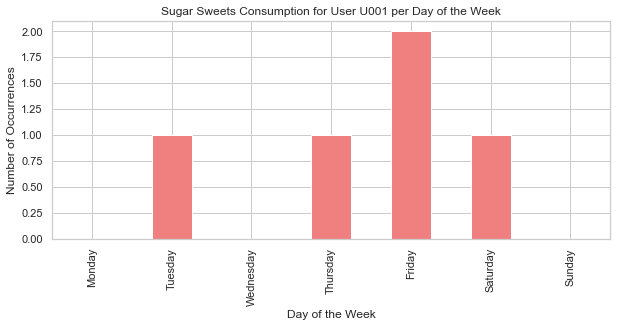

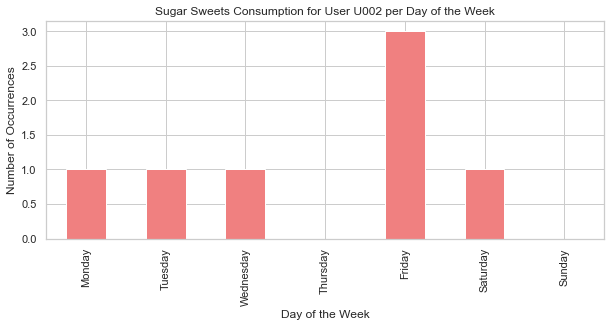

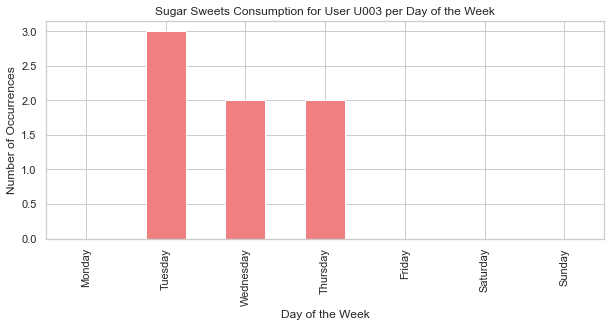

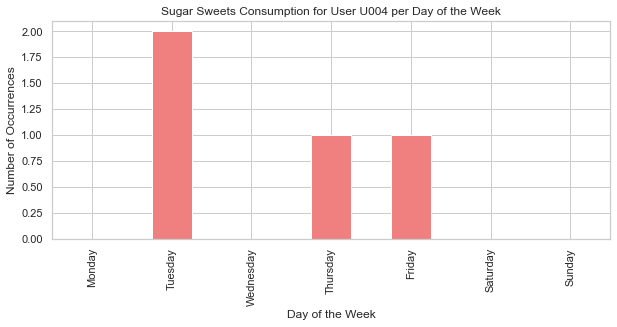

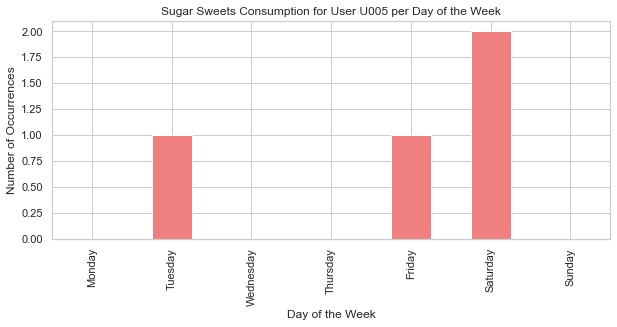

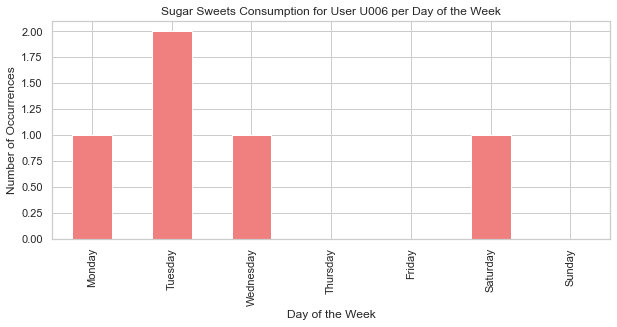

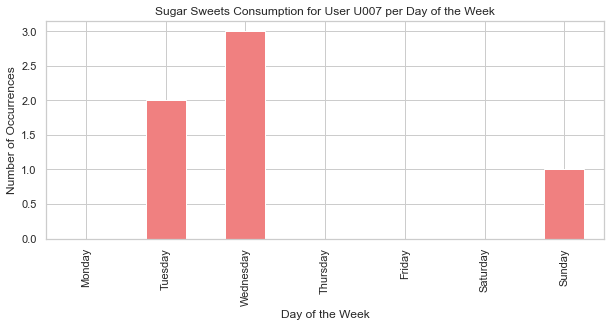

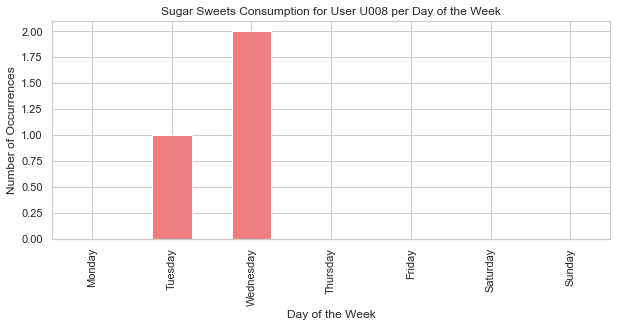

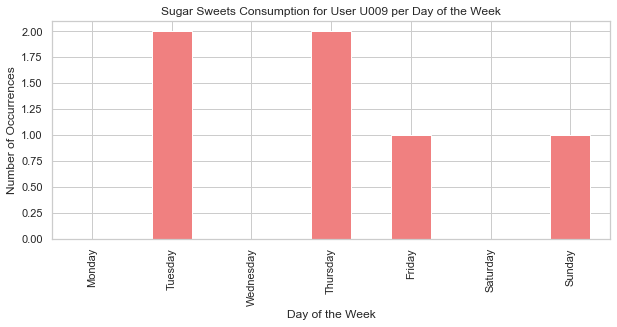

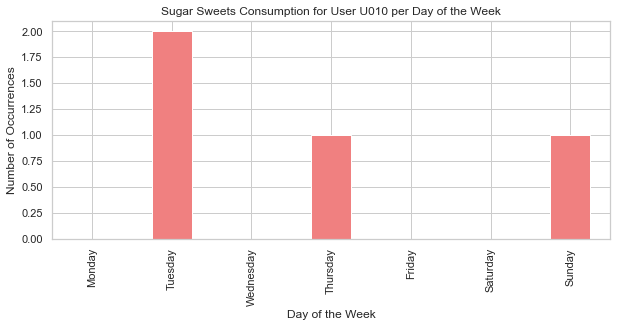

In [230]:
#Sugar_Sweets consumption for each user

import matplotlib.pyplot as plt
import seaborn as sns
sugar_sweets_consumption_df = df_vectorized[df_vectorized['sugar_sweets'] == 1]

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate over each user and plot sugar_sweets consumption per day of the week
for user_id, user_df in sugar_sweets_consumption_df.groupby('user_id'):
    user_daily_sugar_sweets_consumption = user_df.groupby('day_of_week').size().reindex(days_order, fill_value=0)
    
    # Plot sugar_sweets consumption for each user
    plt.figure(figsize=(10, 4))
    user_daily_sugar_sweets_consumption.plot(kind='bar', color='lightcoral')
    plt.title(f'Sugar Sweets Consumption for User {user_id} per Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Occurrences')
    plt.show()
    
    
#Notes on the graph 
#User 008 is the healthiest user with 3 sugar_sweets meal compared to the highest user 002 with 8 meals



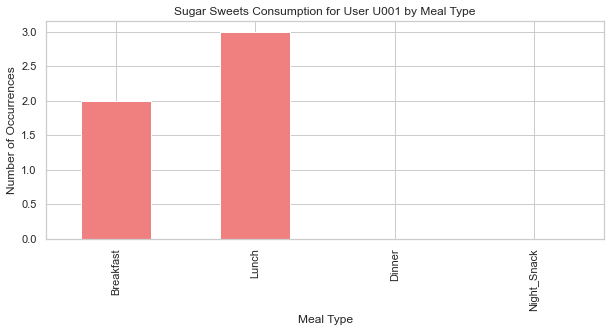

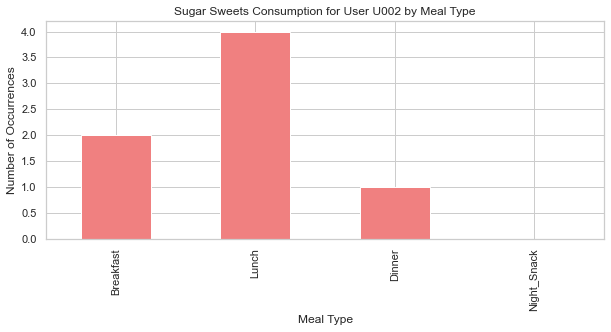

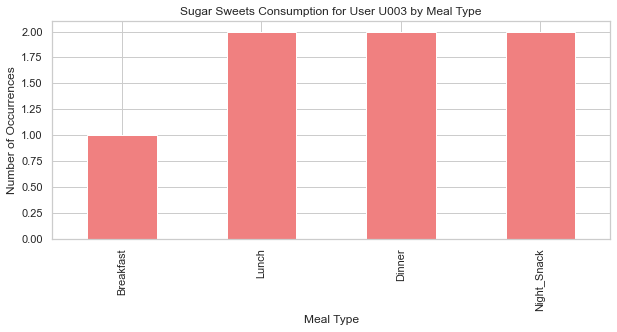

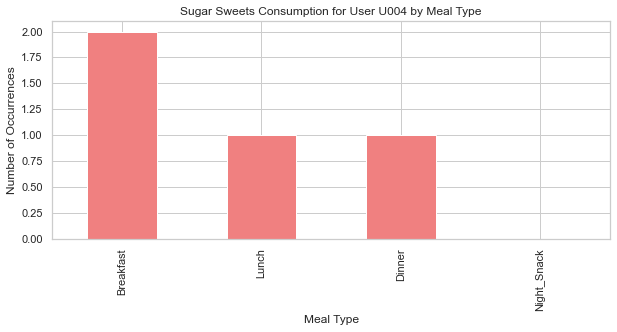

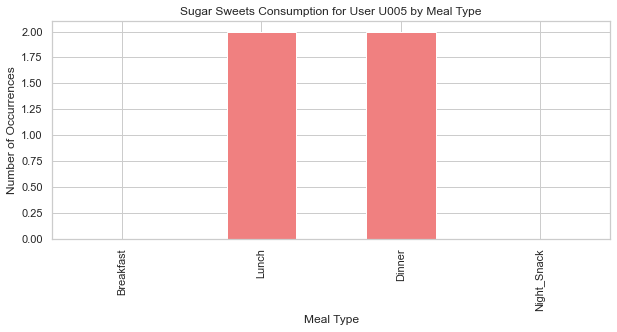

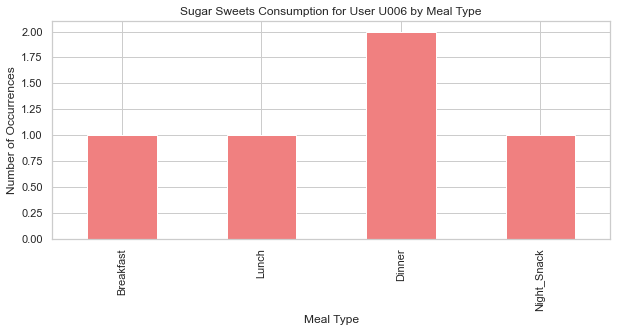

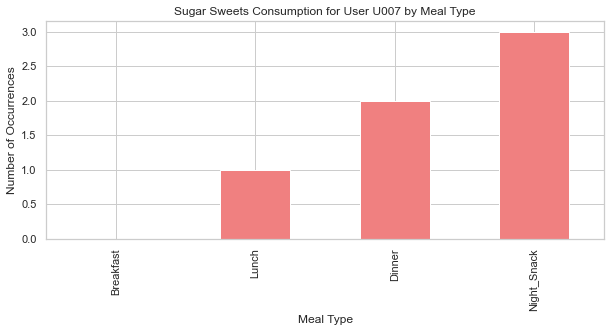

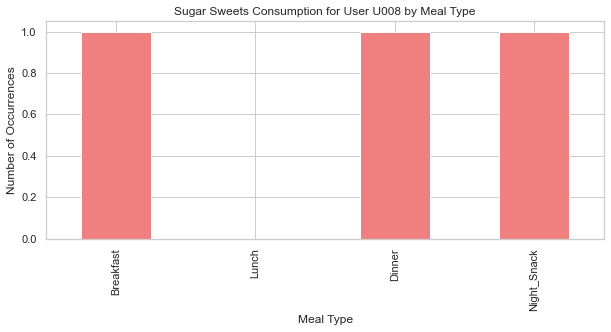

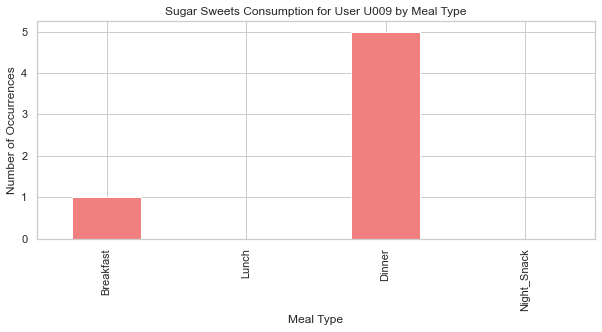

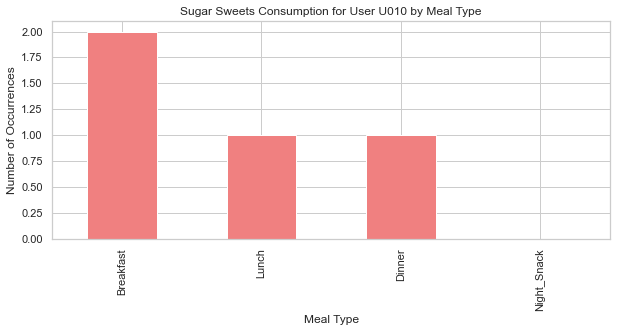

In [235]:
#sugar_sweets consumption in each user's meal
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_vectorized
# Filter only rows where sugar_sweets consumption is 1
sugar_sweets_consumption_df = df_vectorized[df_vectorized['sugar_sweets'] == 1]

# Define the order of meals
meals_order = ['Breakfast', 'Lunch', 'Dinner', 'Night_Snack']

# Iterate over each user and plot sugar_sweets consumption for each meal
for user_id, user_df in sugar_sweets_consumption_df.groupby('user_id'):
    user_meal_sugar_sweets_consumption = user_df.groupby('meal_type').size().reindex(meals_order, fill_value=0)
    
    # Plot sugar_sweets consumption for each user and meal
    plt.figure(figsize=(10, 4))
    user_meal_sugar_sweets_consumption.plot(kind='bar', color='lightcoral')
    plt.title(f'Sugar Sweets Consumption for User {user_id} by Meal Type')
    plt.xlabel('Meal Type')
    plt.ylabel('Number of Occurrences')
    plt.show()


#Notes on the graph
#Users 003, 007 have bad habits by consuming Sugar_sweets on night snacks 

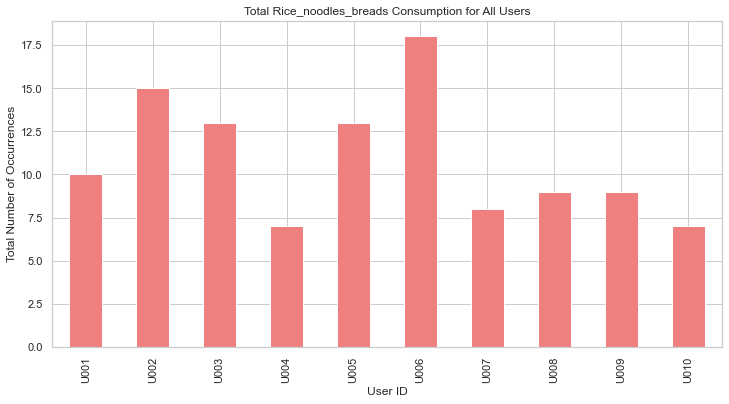

In [238]:
# Total Number of rice_noodles_breads meals consumption for each user


import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df_vectorized[df_vectorized['rice_noodles_breads'] == 1]

# Group by user and count occurrences
user_consumption = filtered_df.groupby('user_id').size()

# Plot total consumption for all users in one bar plot
plt.figure(figsize=(12, 6))
user_consumption.plot(kind='bar', color='lightcoral')
plt.title(f'Total {column_to_analyze.capitalize()} Consumption for All Users')
plt.xlabel('User ID')
plt.ylabel('Total Number of Occurrences')
plt.show()

#Notes on the graph
#user 006 consume the highest carbs meals (18) while user 004 the lowest with nearly (6) meals 



In [180]:
df_vectorized


,description,user_id,log_time,day_of_week,week,month,meal_time_only,meal_type,hour,description_preprocess,...,ziti,drinks_soups,sugar_sweets,meat,rice_noodles_breads,grains,vegetables_salads,fruits,diaries,nuts
0,A plate of scrambled eggs and toast.,U010,2020-01-15 08:30:00,Wednesday,3,1,08:30:00,Breakfast,8,scrambled egg toast .,...,0.0,0,0,0,1,0,0,0,1,0
1,A bowl of vegetable stir-fry with quinoa.,U008,2020-02-02 12:15:00,Sunday,5,2,12:15:00,Breakfast,12,vegetable - quinoa .,...,0.0,0,0,0,0,0,1,0,0,0
2,A serving of grilled chicken with steamed broc...,U005,2020-03-10 18:45:00,Tuesday,11,3,18:45:00,Dinner,18,chicken steamed broccoli .,...,0.0,0,0,1,0,0,1,1,0,0
3,A bowl of lentil soup with a side salad.,U003,2020-04-05 13:00:00,Sunday,14,4,13:00:00,Lunch,13,lentil soup salad .,...,0.0,0,0,0,0,1,1,0,0,0
4,A plate of spaghetti with marinara sauce and m...,U009,2020-05-20 20:00:00,Wednesday,21,5,20:00:00,Dinner,20,spaghetti sauce meatball .,...,0.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,A bowl of pho with rare beef slices and fresh ...,U002,2020-03-05 17:05:00,Thursday,10,3,17:05:00,Lunch,17,pho rare beef fresh herb .,...,0.0,0,0,1,1,0,0,0,0,0
720,A slice of lemon meringue pie with a buttery c...,U003,2020-03-06 13:00:00,Friday,10,3,13:00:00,Lunch,13,lemon meringue pie buttery crust .,...,0.0,0,0,0,0,0,1,0,0,0
721,"A bagel with avocado, tomato, and a sprinkle o...",U009,2020-03-07 08:55:00,Saturday,10,3,08:55:00,Breakfast,8,"bagel avocado , tomato , bagel .",...,0.0,0,0,0,1,0,1,0,0,0
722,A plate of shrimp scampi with linguine pasta.,U005,2020-03-08 18:50:00,Sunday,10,3,18:50:00,Dinner,18,shrimp scampi linguine pasta .,...,0.0,0,0,1,1,0,0,0,0,0


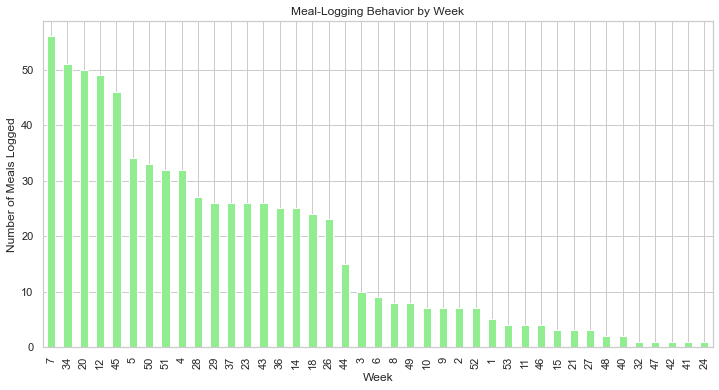

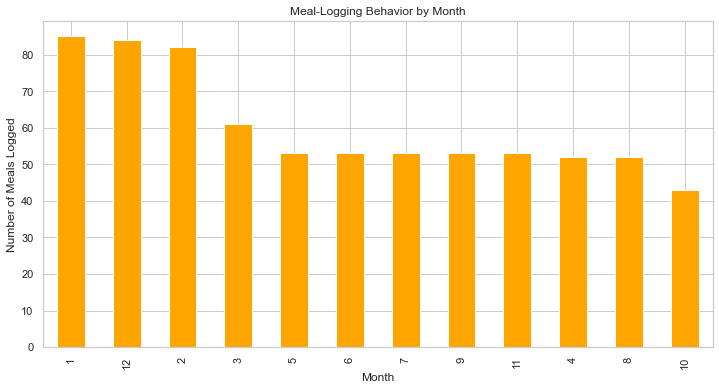

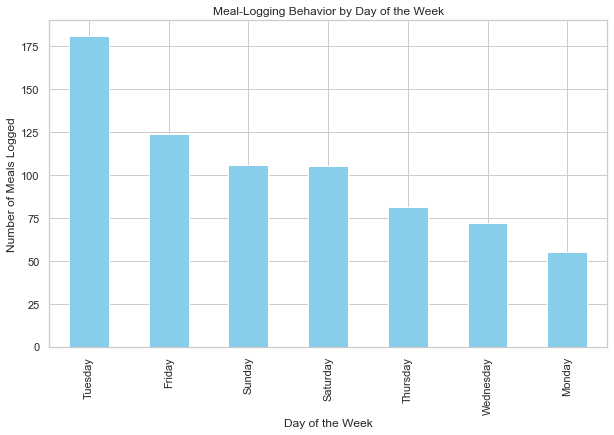

In [221]:
# Meal logging Temporal Trends:
import pandas as pd
import matplotlib.pyplot as plt
week_counts = df_vectorized['week'].value_counts()
month_counts = df_vectorized['month'].value_counts()  # Remove the dot at the end of this line

# Plotting meal-logging by week
plt.figure(figsize=(12, 6))
week_counts.plot(kind='bar', color='lightgreen')
plt.title('Meal-Logging Behavior by Week')
plt.xlabel('Week')
plt.ylabel('Number of Meals Logged')
plt.show()

# Plotting meal-logging by month
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar', color='orange')
plt.title('Meal-Logging Behavior by Month')
plt.xlabel('Month')
plt.ylabel('Number of Meals Logged')
plt.show()

# Plotting meal distribution by day
day_of_week_counts = df_vectorized['day_of_week'].value_counts()

# Plot the distribution of meal-logging by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Meal-Logging Behavior by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Meals Logged')
plt.show()




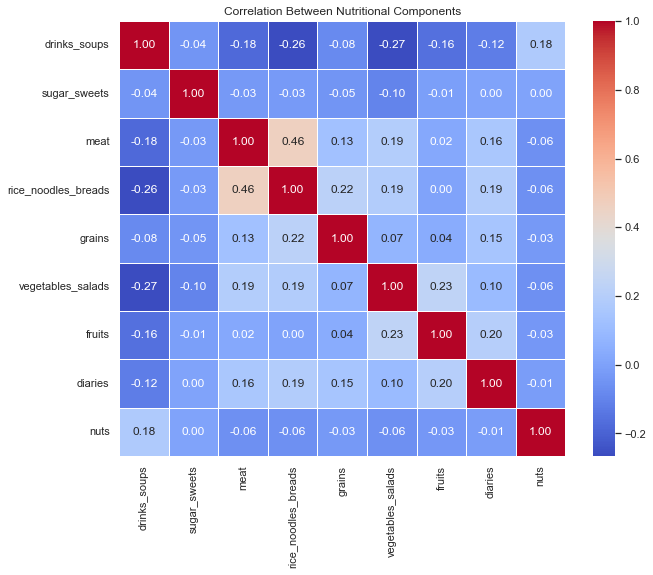

In [192]:
#Nutritional Analysis between food categoy correlations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the nutritional content of commonly consumed foods
common_foods_nutrition = df_vectorized[['drinks_soups', 'sugar_sweets', 'meat', 'rice_noodles_breads', 'grains', 'vegetables_salads', 'fruits', 'diaries', 'nuts']]

# Explore correlations between nutritional components
correlation_matrix = common_foods_nutrition.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Nutritional Components')
plt.show()


In [255]:
#Final data Analysis on users behaviors 

#We have 10 unique users in our dataset
#meals data for user 003 is the highest (more data = old user for Oviva) with 95 meals
#We have 123 night_snack meals
#Night_snack meals should be stopped for all users 
#We have 281 Dinner meals; should be decreased and increase Breakfast meals
#Peak hour for meal distibution is at 18 ,(Dinner meal) Users eat after work
#Tea, coffee and fruits are top 3 consumed food (words) followed by soups and sandwiches .
#Top 3 consumed food categories are (drinks_soups (240),Vegetables_salad(110) and rice_noodles_bread(109)for all users.
#Drinks_soups consumed the top 1 for all users 
#Users 001,005,006 and 009 consume (rice_noodles_bread) as the highest in food categories (after drinks_soups)
#Users 002,003,004,007,008 and 0010 consume vegetables_salads as the highest in food categories (after drinks_soups)
#User 003 has the highest night_snack meals (14) and dinner meals (32) (not healthy)
#User 001 least night_snack meals (2) healthier than other users 
#User 002 highest breakfast meals (24)
#User 006 highest lunch meals (34)
#user 006 consume the highest carbs meals (18) while user 004 the lowest with nearly (6) meals 
#Users 003, 007 have bad habits by consuming Sugar_sweets on night_snacks 
#User 008 is the healthiest user with 3 sugar_sweets meal compared to the highest user 002 with 8 meals
#There are no vegetarian users 
#user 001 should distribute meat meals on other days not on fridays only
#A pattern shows peak logging meals in Tuesday for (lunch and dinner) could be an offer for meals in this day
#Number of logging meals in Tuesday (181)
#Friday is the second highest day with (124) meals logging; in weekend users consume more meals due to end of week they may go eat outside with family and friends. 
#users consume Highest meals in winter seasons December-Feb
#Highest correlation in food_categories between meat and (rice_noodles_bread) 0.46 (medium good correlation)
